In [25]:
import math as math
import numpy as np
import scipy as scipy
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.animation as animation
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import sys
import os

from qutip import *
from src_2_0 import *

In [26]:
### General parameters ###

N = 250 # Dimension of the Hilbert space of the cavity
n_q = 100 # Photon saturation number
C = np.linspace(1e-15,2,30) # Cooperativity (equal to the pumping parameter p)
eta = 0 # Photon loss due to other decay channels

### Hamiltonian parameters ###

g_0 = 10**(-5.9) # Light-matter coupling
Delta = 1 # Detunings Delta_s = Delta_r
r = 0.5 # Squeezing parameter
theta = np.pi # Squeezing angle
Omega_r = 1e-2

### Symmetry broken parameters ###

omega = 0 # Amplitude of the coherent driving with well defined phase
phi = 0 # Fixed phase

In [27]:
k = g_0*np.sqrt(2/(C*n_q)) # Photon decay rate
P = 2*n_q*k # Incoherent pumping
g = g_0*np.cosh(r)
C_s = C*np.cosh(r)**2 # Squeezed cooperativity (equal to the squeezed pumping parameter p_s)

In [37]:
e = open('g20.50_100.txt','r')

data_g2 = e.readlines()

g2 = np.zeros([10000,np.size(C)-2])
tau_vec = np.zeros(10000)

for i in range(10000):
    data_g2[i] = data_g2[i].split()
    g2[i]=data_g2[i][1:]
    tau_vec[i]=data_g2[i][0]

e.close()

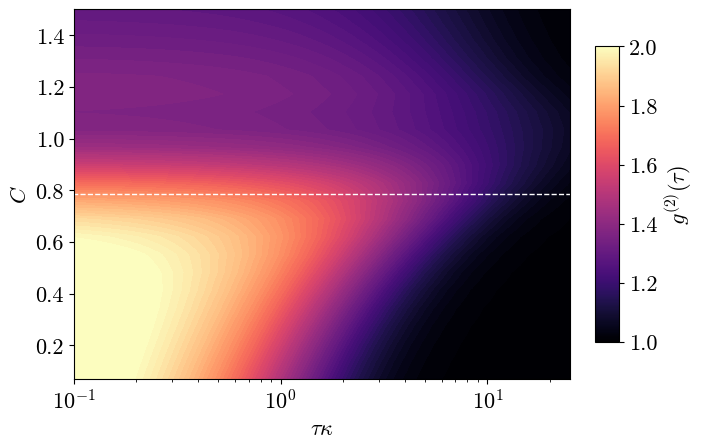

In [40]:
nrm2 = mpl.colors.Normalize(1,2) # Colorbar settings

fig2, ax2 = plt.subplots()

cbar2 = plt.colorbar(cm.ScalarMappable(norm=nrm2, cmap=cm.magma), label=r'$g^{(2)}(\tau)$', cax = ax2.inset_axes([1.05, 0.1, 0.05, 0.8]))
ax2.contourf(tau_vec, C[1:29], np.transpose(g2), 100, cmap=cm.magma, norm=nrm2)
# ax2.imshow(np.transpose(g2), extent = [tau_vec[0],tau_vec[-1],C[1],C[-1]], origin='lower', cmap=cm.hot_r, norm=nrm2, aspect='auto', interpolation='None')
ax2.plot([0,300],[np.cosh(r)**-2,np.cosh(r)**-2],'--',lw=1,color='w')
ax2.set_ylabel(r'$C$')
ax2.set_xlabel(r'$\tau\kappa$')
ax2.set_xscale('log')
ax2.set_xlim([0.1,25])
ax2.set_ylim([0.07,1.5])

fig2.savefig('g2.png',dpi=500, bbox_inches = 'tight')

In [30]:
f = open('SPEC0.50_100.txt','r')

data_spec = f.readlines()

spec = np.zeros([2000,np.size(C)-1])
wlist = np.zeros(2000)

for i in range(2000):
    data_spec[i] = data_spec[i].split()
    spec[i]=data_spec[i][1:]
    wlist[i]=data_spec[i][0]

f.close()

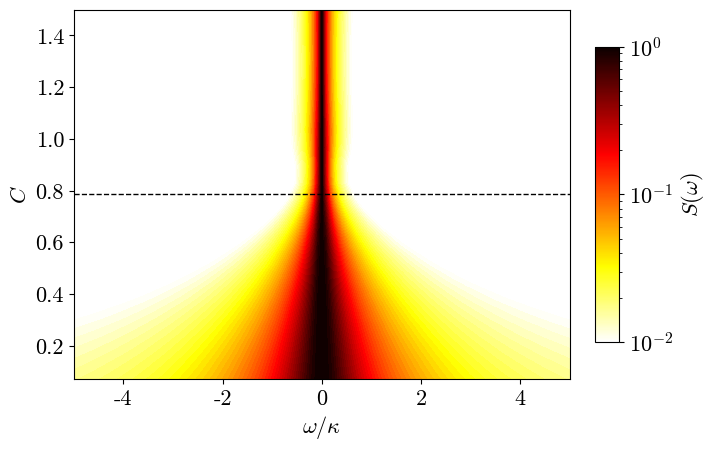

In [31]:
nrm = mpl.colors.Normalize(-2,0) # Colorbar settings

fig, ax = plt.subplots()

cbar = plt.colorbar(cm.ScalarMappable(norm=mpl.colors.LogNorm(0.01,1), cmap=cm.hot_r), label=r'$S(\omega)$', cax = ax.inset_axes([1.05, 0.1, 0.05, 0.8]))
ax.contourf(wlist, C[1:], np.log10(np.transpose(spec)), 100, cmap=cm.hot_r, norm=nrm)
# ax.imshow(np.log10(np.transpose(spec)), extent = [wlist[0],wlist[-1],C[1],C[-1]], origin='lower', cmap=cm.hot_r, norm=nrm, aspect='auto', interpolation='None')
ax.plot([-5,5],[np.cosh(r)**-2,np.cosh(r)**-2],'--',lw=1,color='k')
ax.set_ylabel(r'$C$')
ax.set_xlabel(r'$\omega/\kappa$')
ax.set_xlim([-5,5])
ax.set_ylim([0.07,1.5])

fig.savefig('spec.png',dpi=500, bbox_inches = 'tight')

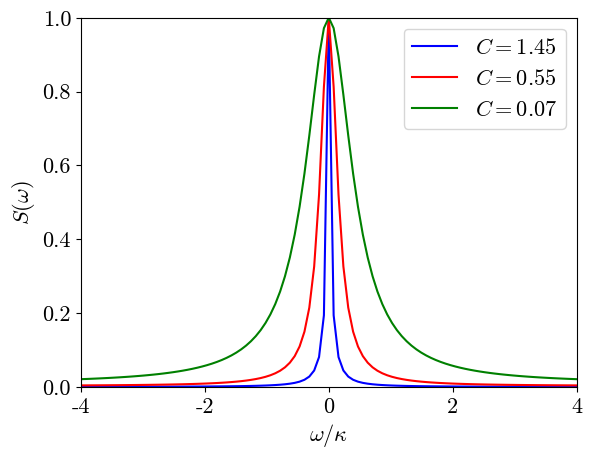

In [32]:
fig3, ax3 = plt.subplots()
ax3.plot(wlist,np.real(spec[:,20])/np.max(np.real(spec[:,20])),'b',label='$C=$'+str(format(C[21],'.2f')))
ax3.plot(wlist,np.real(spec[:,7])/np.max(np.real(spec[:,7])),'r',label='$C=$'+str(format(C[8],'.2f')))
ax3.plot(wlist,np.real(spec[:,0])/np.max(np.real(spec[:,0])),'g',label='$C=$'+str(format(C[1],'.2f')))
# plt.title('freq. spectrum',fontsize=14)
plt.xlabel('$\omega/\kappa$')
plt.ylabel('$S(\omega)$')
plt.xlim([-4,4])
plt.ylim([0,1.0])
plt.legend()
fig3.savefig('spec_2.png',dpi=500, bbox_inches = 'tight')